In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("StudentsPerformance.csv")
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-pastel')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [44]:
# Check basic information about the dataset
print(f'Dataset Shape: {df.shape}')
print('Dataset Information:')
df.info()

# Check for missing values
print('Missing Values:')
print(df.isnull().sum())

# Statistical summary
print('Statistical Summary:')
df.describe().round(2)

Dataset Shape: (101, 8)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       101 non-null    object
 1   race/ethnicity               101 non-null    object
 2   parental level of education  101 non-null    object
 3   lunch                        101 non-null    object
 4   test preparation course      101 non-null    object
 5   math score                   101 non-null    int64 
 6   reading score                101 non-null    int64 
 7   writing score                101 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB
Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score    

,math score,reading score,writing score
count,101.00,101.00,101.00
mean,61.07,64.59,63.35
std,15.58,15.15,16.03
min,0.00,17.00,10.00
25%,52.00,55.00,53.00
50%,62.00,65.00,65.00
75%,71.00,75.00,75.00
max,97.00,95.00,93.00


In [45]:
# Create derived features
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Create performance categories
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

df['grade'] = df['average_score'].apply(assign_grade)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C


In [46]:
# For filtering students by gender
gender_filter = df[df['gender'] == 'female']

gender_filter.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F


In [47]:
# race/ethnicity and aggregate the scores
agg_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

agg_scores


,math score,reading score,writing score
race/ethnicity,,,
group A,57.500000,59.700000,57.800000
group B,59.521739,62.043478,60.304348
group C,60.931034,65.862069,65.103448
group D,61.777778,66.555556,66.185185
group E,65.750000,66.083333,63.166667


In [48]:
# Count students based on their parental level of education
parental_education_count = df['parental level of education'].value_counts()

parental_education_count


parental level of education
some college          29
associate's degree    29
some high school      17
high school           12
master's degree        8
bachelor's degree      6
Name: count, dtype: int64

In [49]:
# Group by lunch type and compare average scores
lunch_comparison = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

lunch_comparison


,math score,reading score,writing score
lunch,,,
free/reduced,52.666667,56.606061,55.575758
standard,65.147059,68.470588,67.117647


In [50]:
# average score for each student
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

#top 10% performers
top_10_percent = df.nlargest(int(0.1 * len(df)), 'average_score')

top_10_percent[['gender', 'average_score']]


,gender,average_score
2,female,92.666667
6,female,91.666667
34,male,88.666667
16,female,87.666667
38,female,84.333333
56,female,84.333333
100,male,84.000000
49,female,82.666667
1,female,82.333333
54,female,80.666667


## Data Visualization

Now let's create some insightful visualizations to better understand the data.

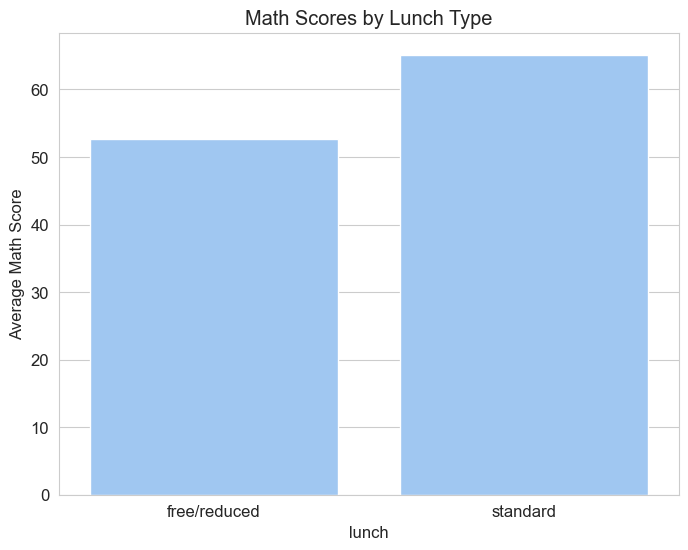

In [51]:
#Adding visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Barplot for comparison of math scores by lunch type
sns.barplot(x=lunch_comparison.index, y=lunch_comparison['math score'])

plt.title('Math Scores by Lunch Type')
plt.ylabel('Average Math Score')
plt.show()


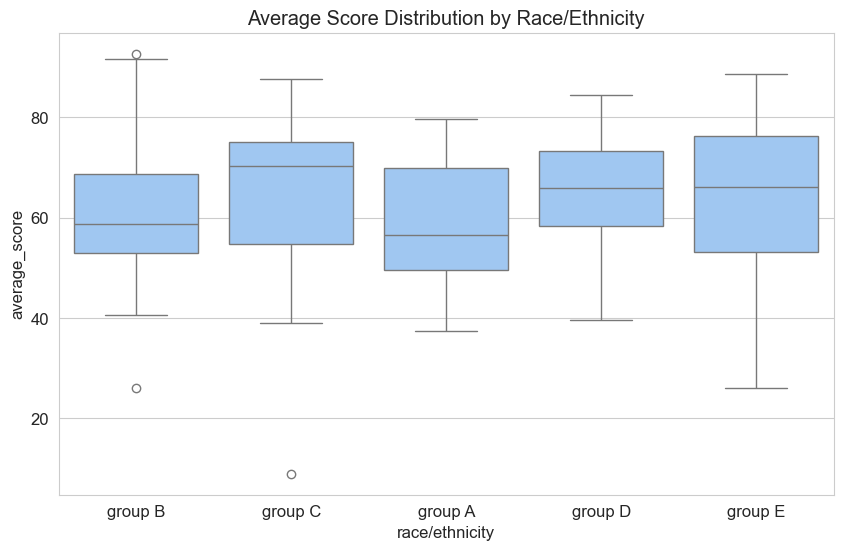

In [52]:
# Boxplot for score distribution by race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race/ethnicity', y='average_score', data=df)
plt.title('Average Score Distribution by Race/Ethnicity')
plt.show()


## Distribution of Scores

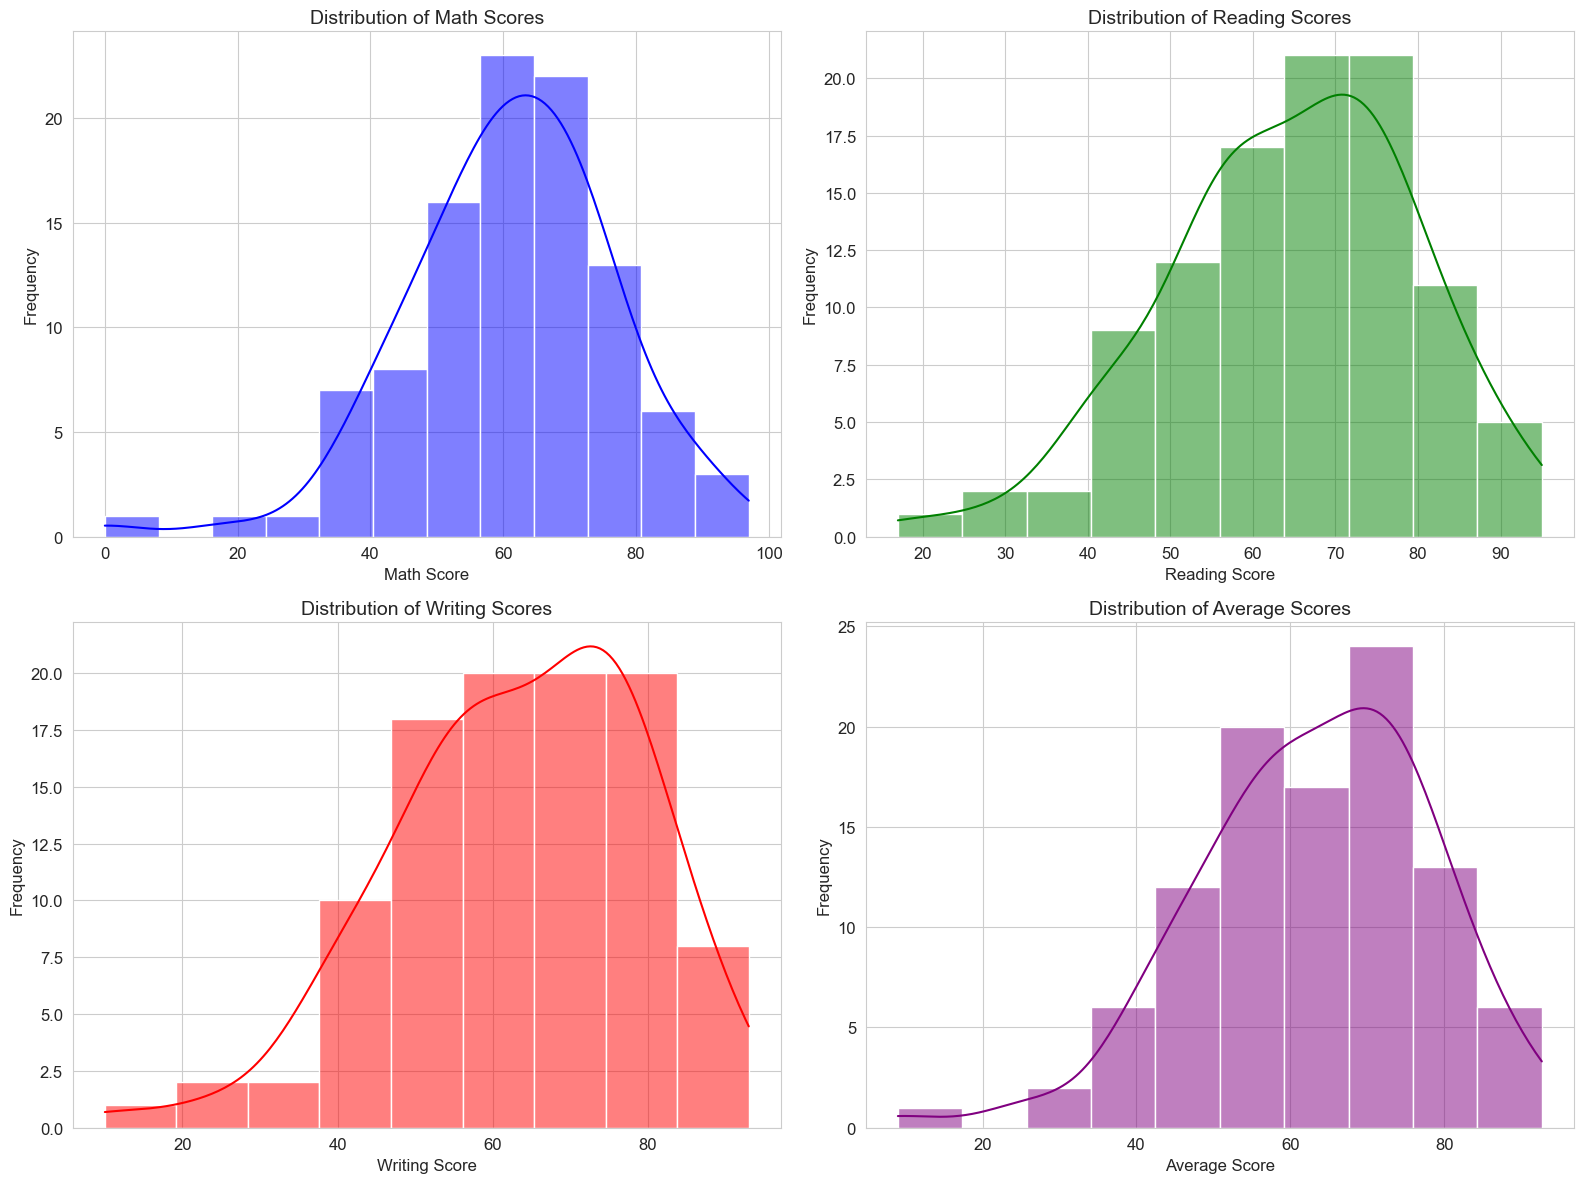

In [53]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot distributions of each score type
sns.histplot(df['math score'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Math Scores', fontsize=14)
axes[0, 0].set_xlabel('Math Score', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['reading score'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Reading Scores', fontsize=14)
axes[0, 1].set_xlabel('Reading Score', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['writing score'], kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Writing Scores', fontsize=14)
axes[1, 0].set_xlabel('Writing Score', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['average_score'], kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Average Scores', fontsize=14)
axes[1, 1].set_xlabel('Average Score', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

## Score Comparision by gender

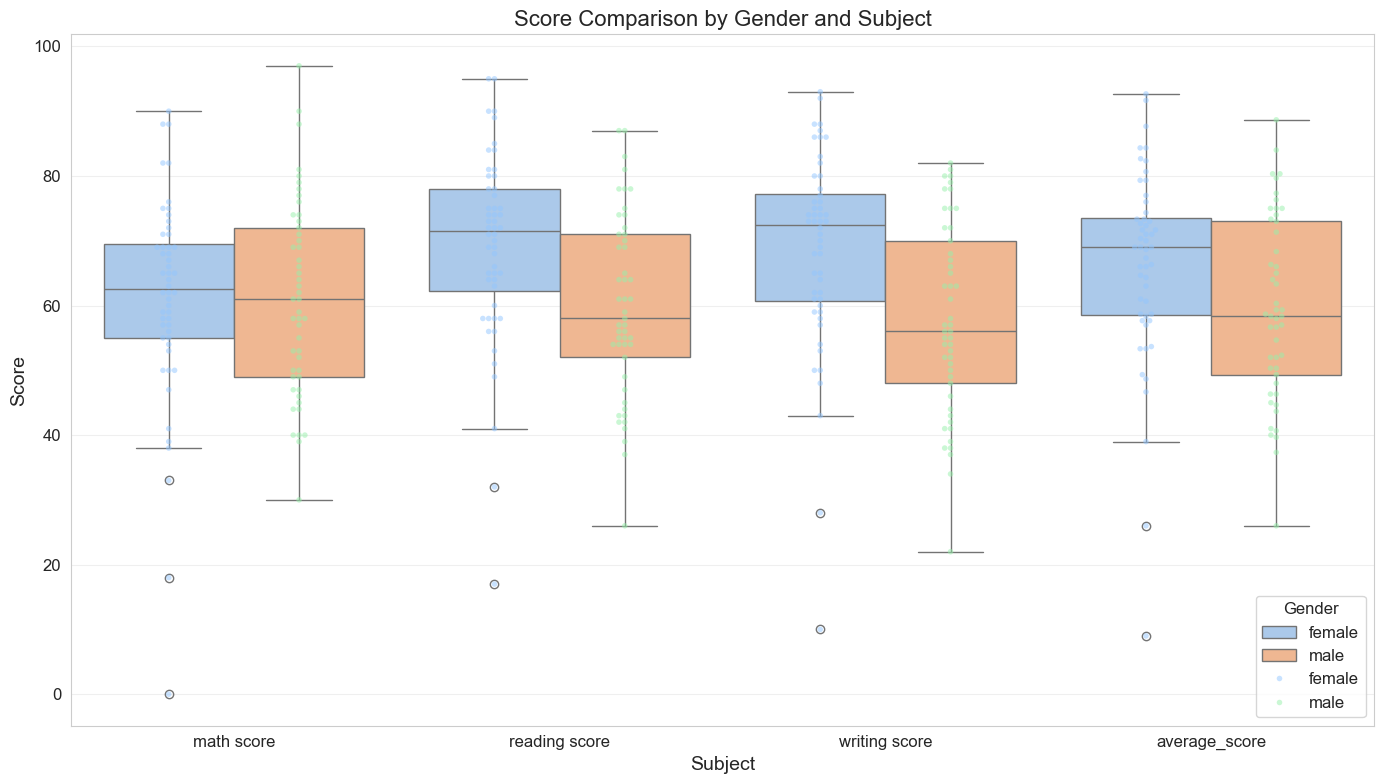

In [54]:
# Create a figure for gender comparison
plt.figure(figsize=(14, 8))

# Prepare data for plotting
score_columns = ['math score', 'reading score', 'writing score', 'average_score']

# Create a grouped boxplot
melted_df = pd.melt(df, id_vars=['gender'], value_vars=score_columns, 
                    var_name='Subject', value_name='Score')

# Create a more informative boxplot with swarmplot overlay
ax = sns.boxplot(x='Subject', y='Score', hue='gender', data=melted_df, palette='pastel')
sns.swarmplot(x='Subject', y='Score', hue='gender', data=melted_df, dodge=True, alpha=0.5, size=4)

# Customize the plot
plt.title('Score Comparison by Gender and Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Adjust x-axis labels
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

## Performance by Parental Education Level

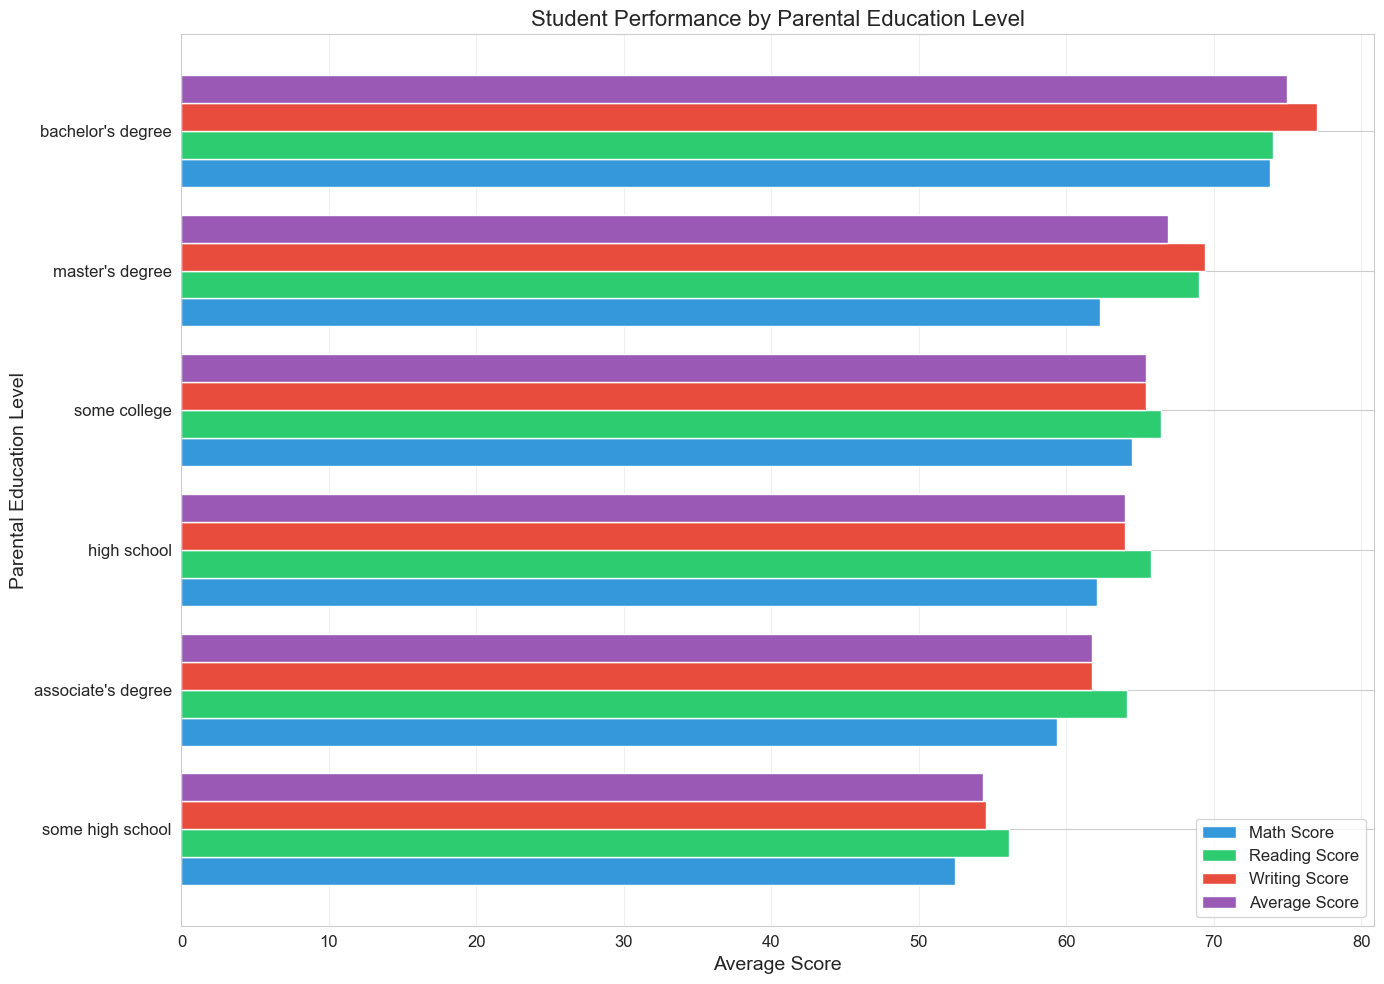

In [55]:
# Group by parental education level and calculate mean scores
education_scores = df.groupby('parental level of education')[score_columns].mean().reset_index()

# Sort by average score for better visualization
education_scores = education_scores.sort_values('average_score')

# Create a horizontal bar chart
plt.figure(figsize=(14, 10))

# Create a custom colormap
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# Plot each score type
bar_width = 0.2
x = np.arange(len(education_scores['parental level of education']))

for i, column in enumerate(score_columns):
    plt.barh(x + i*bar_width, education_scores[column], height=bar_width, 
             color=colors[i], label=column.replace('_', ' ').title())

# Customize the plot
plt.yticks(x + bar_width*1.5, education_scores['parental level of education'], fontsize=12)
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('Parental Education Level', fontsize=14)
plt.title('Student Performance by Parental Education Level', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/qk/z7tdk54j1lzgwgysmchbsvtc0000gn/T/ipykernel_80373/3325533177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='test preparation course', y='math score', data=df, ax=axes[0, 0], palette='pastel')
/var/folders/qk/z7tdk54j1lzgwgysmchbsvtc0000gn/T/ipykernel_80373/3325533177.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='test preparation course', y='reading score', data=df, ax=axes[0, 1], palette='pastel')
/var/folders/qk/z7tdk54j1lzgwgysmchbsvtc0000gn/T/ipykernel_80373/3325533177.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

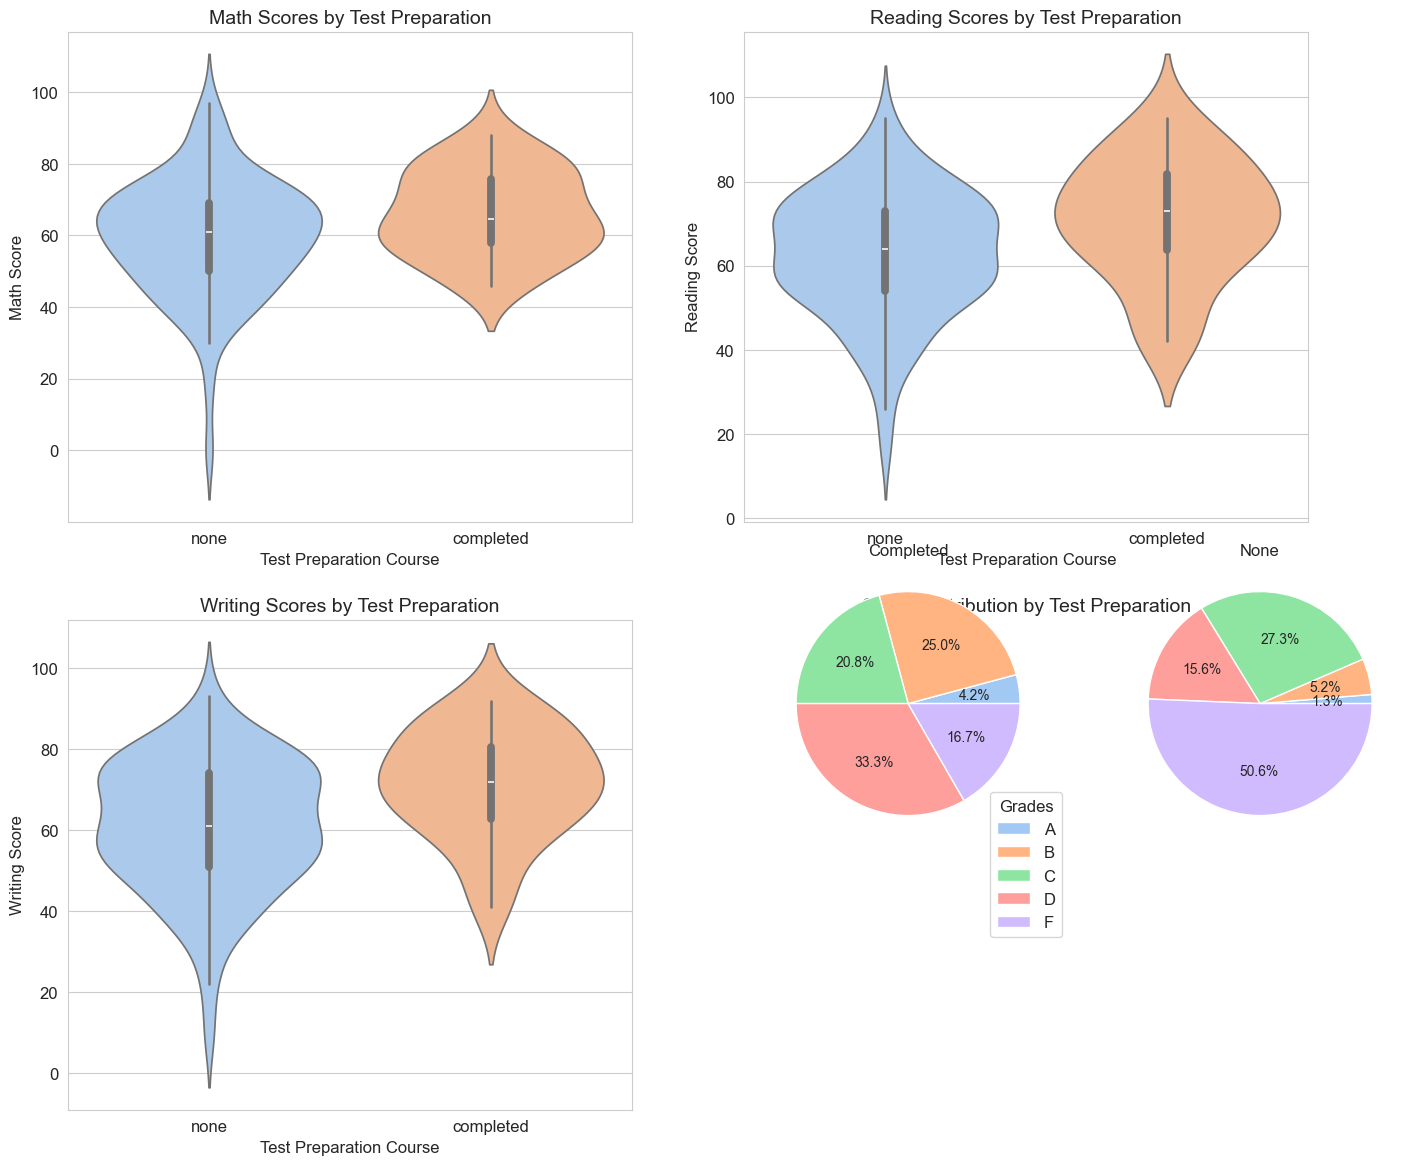

In [58]:
# Create a figure for test preparation impact
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Violin plots for each score type
sns.violinplot(x='test preparation course', y='math score', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Math Scores by Test Preparation', fontsize=14)
axes[0, 0].set_xlabel('Test Preparation Course', fontsize=12)
axes[0, 0].set_ylabel('Math Score', fontsize=12)

sns.violinplot(x='test preparation course', y='reading score', data=df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Reading Scores by Test Preparation', fontsize=14)
axes[0, 1].set_xlabel('Test Preparation Course', fontsize=12)
axes[0, 1].set_ylabel('Reading Score', fontsize=12)

sns.violinplot(x='test preparation course', y='writing score', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Writing Scores by Test Preparation', fontsize=14)
axes[1, 0].set_xlabel('Test Preparation Course', fontsize=12)
axes[1, 0].set_ylabel('Writing Score', fontsize=12)

# Pie chart for grade distribution by test preparation
prep_grade_counts = df.groupby(['test preparation course', 'grade']).size().unstack()

# Create two pie charts side by side
for i, prep in enumerate(prep_grade_counts.index):
    # Create a smaller axis for the pie chart
    ax_pie = plt.axes([0.55 + i*0.22, 0.3, 0.2, 0.2])
    
    # Plot the pie chart
    wedges, texts, autotexts = ax_pie.pie(prep_grade_counts.loc[prep], 
                                         autopct='%1.1f%%', 
                                         textprops={'fontsize': 10},
                                         colors=sns.color_palette('pastel', n_colors=5))
    
    # Add a title
    ax_pie.set_title(f'{prep.title()}', fontsize=12)

# Add a legend for the pie charts
axes[1, 1].axis('off')
axes[1, 1].legend(wedges, prep_grade_counts.columns, title='Grades', loc='center')
axes[1, 1].set_title('Grade Distribution by Test Preparation', fontsize=14)

plt.show()

## Correlation Analysis

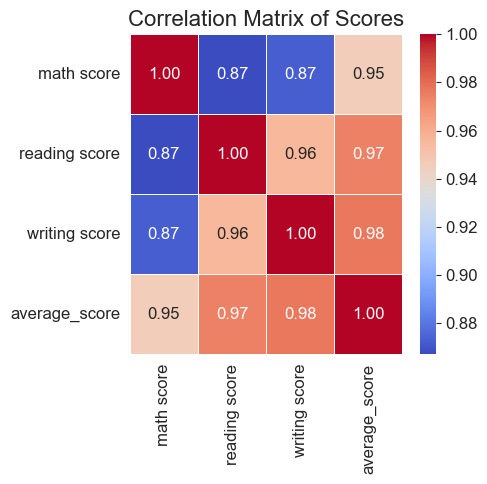

In [57]:
# Calculate correlation matrix for numeric columns
numeric_df = df[['math score', 'reading score', 'writing score', 'average_score']]
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Scores', fontsize=16)
plt.tight_layout()
plt.show()

### Performance by Race/Ethnicity and Lunch Type

/var/folders/qk/z7tdk54j1lzgwgysmchbsvtc0000gn/T/ipykernel_80373/2338727716.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race/ethnicity', y='average_score_mean', data=ethnicity_data,
/var/folders/qk/z7tdk54j1lzgwgysmchbsvtc0000gn/T/ipykernel_80373/2338727716.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='lunch', y='average_score', data=df, inner=None, ax=axes[1], palette='pastel')


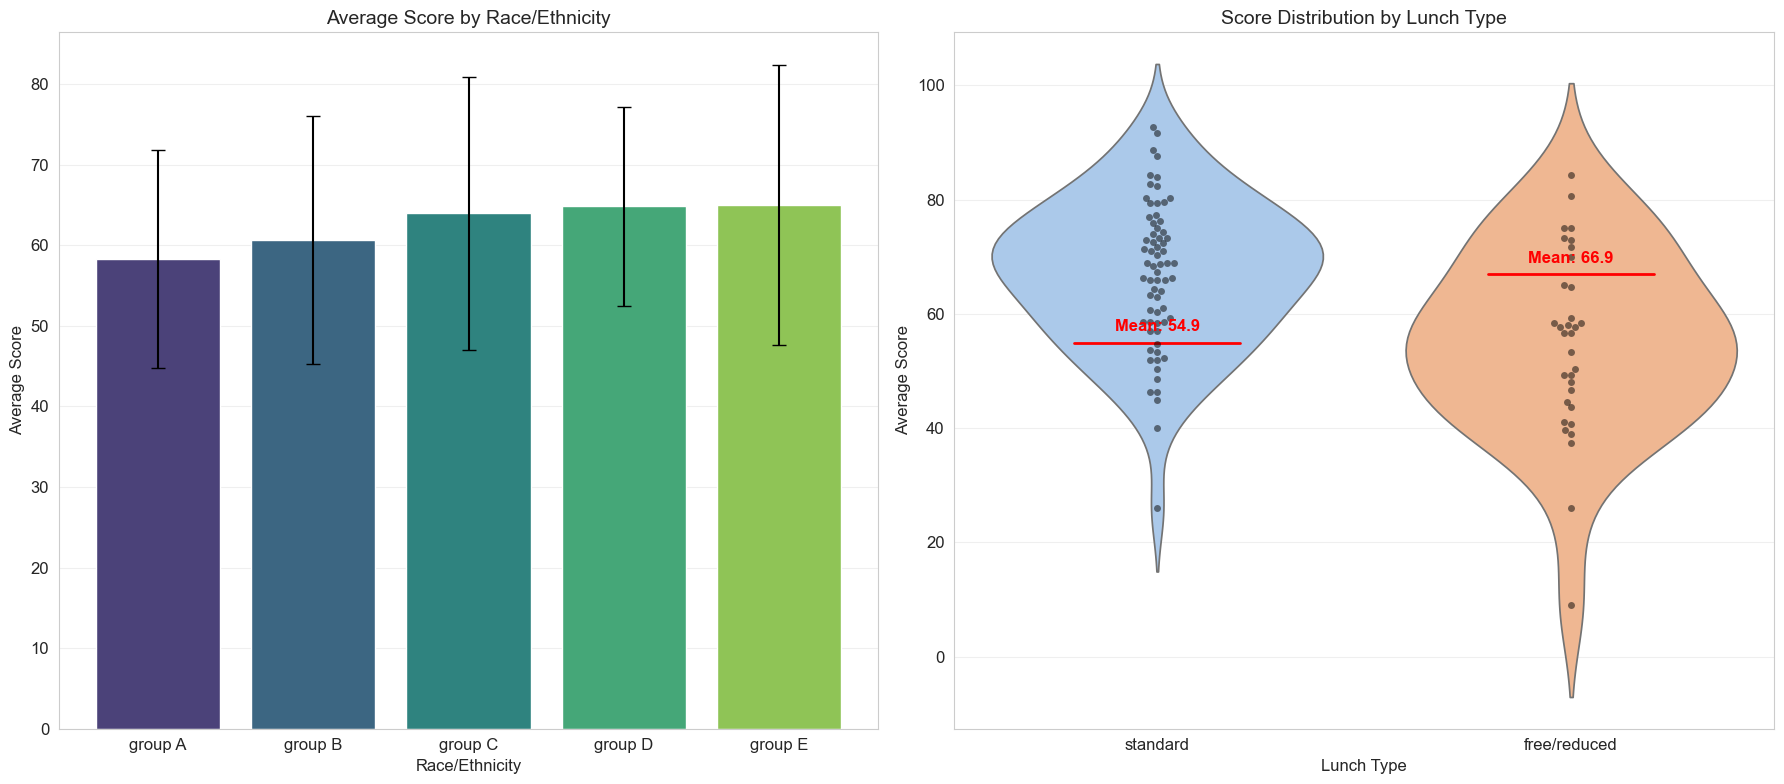

In [59]:
# Create a figure for ethnicity and lunch type analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Performance by race/ethnicity
ethnicity_scores = df.groupby('race/ethnicity')['average_score'].mean().sort_values().reset_index()

# Create a bar plot with error bars (standard deviation)
ethnicity_std = df.groupby('race/ethnicity')['average_score'].std().reset_index()
ethnicity_data = pd.merge(ethnicity_scores, ethnicity_std, on='race/ethnicity', suffixes=('_mean', '_std'))

sns.barplot(x='race/ethnicity', y='average_score_mean', data=ethnicity_data, 
            palette='viridis', ax=axes[0])

# Add error bars
for i, row in ethnicity_data.iterrows():
    axes[0].errorbar(i, row['average_score_mean'], yerr=row['average_score_std'], 
                    color='black', capsize=5, capthick=1)

axes[0].set_title('Average Score by Race/Ethnicity', fontsize=14)
axes[0].set_xlabel('Race/Ethnicity', fontsize=12)
axes[0].set_ylabel('Average Score', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Performance by lunch type
# Create a more complex visualization - violin plot with swarm overlay
sns.violinplot(x='lunch', y='average_score', data=df, inner=None, ax=axes[1], palette='pastel')
sns.swarmplot(x='lunch', y='average_score', data=df, color='black', alpha=0.5, ax=axes[1])

# Add mean markers
lunch_means = df.groupby('lunch')['average_score'].mean()
for i, lunch_type in enumerate(lunch_means.index):
    axes[1].plot([i-0.2, i+0.2], [lunch_means[lunch_type], lunch_means[lunch_type]], 
                 color='red', linewidth=2)
    axes[1].text(i, lunch_means[lunch_type]+2, f'Mean: {lunch_means[lunch_type]:.1f}', 
                ha='center', color='red', fontweight='bold')

axes[1].set_title('Score Distribution by Lunch Type', fontsize=14)
axes[1].set_xlabel('Lunch Type', fontsize=12)
axes[1].set_ylabel('Average Score', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()